Closed-form solution for beta: [[0.32767539]
 [0.17531122]]
Closed-form solution for beta: [[ 0.58509404]
 [ 0.40240477]
 [-0.03012196]]
Closed-form solution for beta: [[ 0.79547466]
 [ 0.392795  ]
 [-0.05100239]
 [ 0.0019533 ]]
Closed-form solution for beta: [[ 0.53441249]
 [ 0.68726494]
 [-0.03354176]
 [-0.01352472]
 [ 0.00106397]]
Closed-form solution for beta: [[ 5.45265720e-01]
 [ 6.96296053e-01]
 [-3.73135202e-02]
 [-1.39094939e-02]
 [ 1.22168352e-03]
 [-8.94358723e-06]]
Closed-form solution for beta: [[ 4.59414498e-01]
 [ 7.22564636e-01]
 [-7.84770070e-03]
 [-1.97666751e-02]
 [ 2.73982388e-04]
 [ 2.29532633e-04]
 [-1.15077837e-05]]
Closed-form solution for beta: [[ 4.59592454e-01]
 [ 7.28852024e-01]
 [-8.32091964e-03]
 [-2.06560966e-02]
 [ 3.79099629e-04]
 [ 2.51899016e-04]
 [-1.56474857e-05]
 [ 1.72170732e-07]]
Closed-form solution for beta: [[ 4.63775697e-01]
 [ 7.31645213e-01]
 [-1.12629927e-02]
 [-2.08614515e-02]
 [ 6.67415631e-04]
 [ 2.34368226e-04]
 [-2.21925758e-05]
 [ 1.

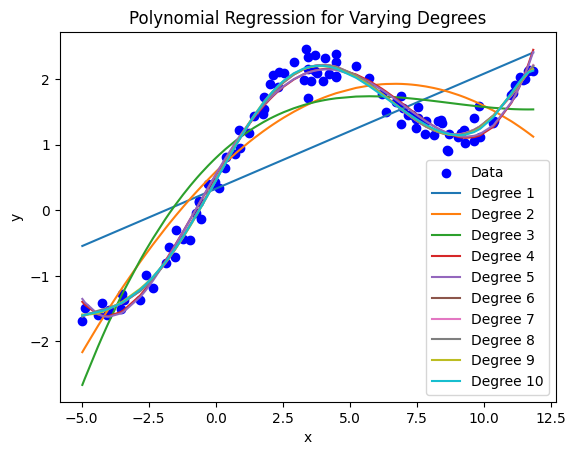

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data from the files
x_data = np.loadtxt('hw1x.dat')
y_data = np.loadtxt('hw1y.dat')

# 호환성을 위해 데이터 차원을 재조정
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)


# 주어진 차수(degree)에 대해 다항 회귀를 수행하고, 학습된 가중치와 예측값 반환
def polynomial_regression(degree):

    # polynomial features 생성
    x_poly = np.hstack([x_data**i for i in range(0, degree + 1)])

    # Closed-form solution (정규 방정식) 을 통한 계수값 계산
    X = np.array(x_poly)
    Y = np.array(y_data)

    # 1. 정규방정식을 통해 beta를 구하고 y_pred 예측하기

    # X.T @ X는 (X^T X), np.linalg.inv()는 역행렬을 계산
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y

    print(f'Closed-form solution for beta: {beta}')


    y_pred = X @ beta

    # 2. LinearRegression 모델을 활용해서 y_pred 예측하기
    #lr = LinearRegression()
    #lr.fit(x_poly, y_data)
    #y_pred = lr.predict(x_poly)

    return y_pred

# 오버핏 문제를 관찰하기 위해 n을 반복적으로 증가시킴
def observe_overfitting(max_degree):
    plt.scatter(x_data, y_data, color='blue', label='Data')

    # x_data를 정렬한 후 정렬된 인덱스 기반으로 정렬
    sorted_idx = np.argsort(x_data[:, 0])
    sorted_x_data = x_data[sorted_idx]

    for degree in range(1, max_degree + 1):
        # degree에 따른 다항 회귀
        y_pred = polynomial_regression(degree)

        # y_pred도 정렬된 순서에 맞추기
        sorted_y_pred = y_pred[sorted_idx]

        # 각 차수에 대한 결과를 플롯에 추가
        plt.plot(sorted_x_data, sorted_y_pred, label=f'Degree {degree}')


    # 그래프 레이블 설정
    plt.title('Polynomial Regression for Varying Degrees')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # 결과 플롯 출력
    plt.show()

# 차수를 증가시키면서 오버피팅 관찰
observe_overfitting(max_degree=10)




Closed-form solution for beta: [[0.32767539]
 [0.17531122]]


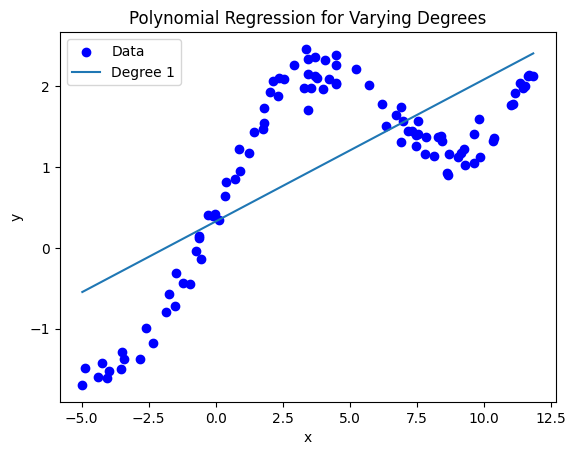

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the files
x_data = np.loadtxt('hw1x.dat')
y_data = np.loadtxt('hw1y.dat')

# 호환성을 위해 데이터 차원을 재조정
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)


# 주어진 차수(degree)에 대해 다항 회귀를 수행하고, 학습된 가중치와 예측값 반환
def polynomial_regression(degree):
    # polynomial features 생성
    x_poly = np.hstack([x_data**i for i in range(0, degree + 1)])

    # Closed-form solution (정규 방정식) 을 통한 계수값 계산
    X = np.array(x_poly)
    Y = np.array(y_data)

    # X.T @ X는 (X^T X), np.linalg.inv()는 역행렬을 계산
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    print(f'Closed-form solution for beta: {beta}')

    y_pred = X @ beta

    return y_pred

plt.scatter(x_data, y_data, color='blue', label='Data')

# x_data를 정렬한 후 정렬된 인덱스 기반으로 정렬
sorted_idx = np.argsort(x_data[:, 0])
sorted_x_data = x_data[sorted_idx]


# degree에 따른 다항 회귀
y_pred = polynomial_regression(1)

# y_pred도 정렬된 순서에 맞추기
sorted_y_pred = y_pred[sorted_idx]

# 각 차수에 대한 결과를 플롯에 추가
plt.plot(sorted_x_data, sorted_y_pred, label=f'Degree 1')


# 그래프 레이블 설정
plt.title('Linear Regression Using Closed-form solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 결과 플롯 출력
plt.show()



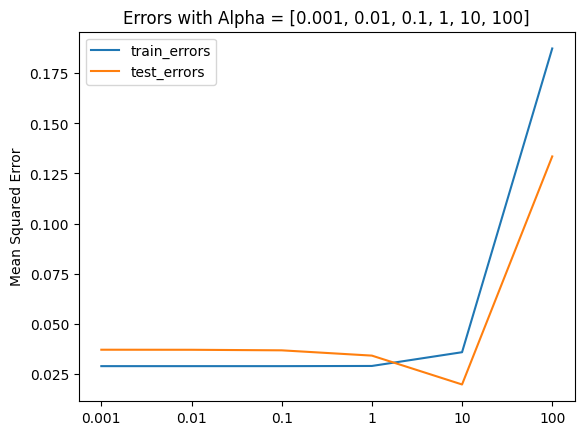

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data from the local files
x_data = np.loadtxt('hw1x.dat')
y_data = np.loadtxt('hw1y.dat')

# Reshape for compatibility
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Ridge Regression for different alpha values
def ridge_regression(degree, alpha):
    # Generate polynomial features
    x_poly_train = np.hstack([x_train**i for i in range(0, degree + 1)])
    x_poly_test = np.hstack([x_test**i for i in range(0, degree + 1)])

    # Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_poly_train, y_train)

    # Predict values
    y_train_pred = ridge.predict(x_poly_train)
    y_test_pred = ridge.predict(x_poly_test)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return y_train_pred, y_test_pred, train_error, test_error

# Observing overfitting with Ridge Regression with different alpha values
def observe_ridge_regularization(max_degree, alphas):
    train_errors = []
    test_errors = []

    sorted_idx_train = np.argsort(x_train[:, 0])
    sorted_x_train = x_train[sorted_idx_train]

    sorted_idx_test = np.argsort(x_test[:, 0])
    sorted_x_test = x_test[sorted_idx_test]


    for alpha in alphas:

        y_train_pred, y_test_pred, train_error, test_error = ridge_regression(5, alpha)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Error plot

    plt.plot(np.log10(alphas), train_errors, label=f'train_errors')
    plt.plot(np.log10(alphas), test_errors, label=f'test_errors')
    plt.xticks(np.log10(alphas), alphas)
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.title(f'Errors with Alpha = {alphas}')
    plt.show()

# Test with a range of alpha values
observe_ridge_regularization(max_degree=3, alphas= [0.001, 0.01, 0.1, 1, 10, 100])


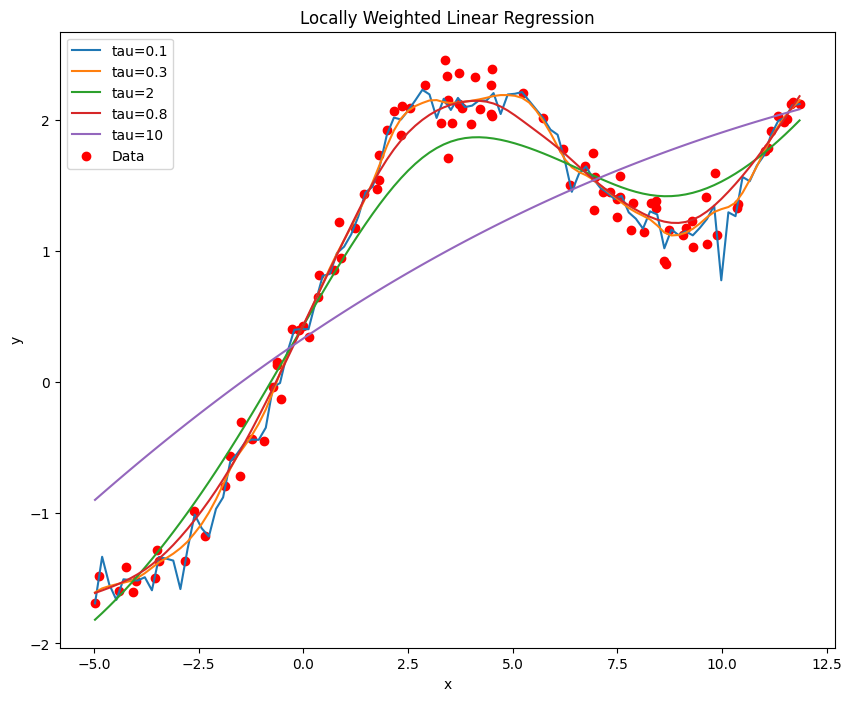

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
x_data = np.loadtxt('hw1x.dat')
y_data = np.loadtxt('hw1y.dat')

# Reshape for compatibility
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Locally Weighted Linear Regression (LWLR) 구현
def locally_weighted_regression(x_query, tau):
    m = len(x_data)
    W = np.exp(-((x_data - x_query)**2) / (2 * tau**2))

    #print((x_data - x_query).shape)
    W = np.diag(W.flatten())  # 대각 행렬로 변환

    # Normal equation: theta = (X^T W X)^{-1} X^T W y
    X = np.hstack((np.ones_like(x_data), x_data))  # 상수항 추가
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y_data
    return theta

# 예측 함수
def predict(x_query, tau):
    theta = locally_weighted_regression(x_query, tau)
    return np.hstack([1, x_query]) @ theta

# 다양한 tau 값에 대해 결과 시각화
taus = [0.1,0.3,2,0.8,10]
x_range = np.linspace(min(x_data), max(x_data), 100)

plt.figure(figsize=(10, 8))

for tau in taus:
    y_pred = [predict(x, tau) for x in x_range]
    plt.plot(x_range, y_pred, label=f'tau={tau}')

# 실제 데이터 플로팅
plt.scatter(x_data, y_data, color='red', label='Data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Locally Weighted Linear Regression')
plt.show()
